In [337]:
#Q1 Q2 Q3

In [3]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

C:\Users\RT\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
bit=pd.read_csv("Kraken.csv")
sp=pd.read_csv("SP500.csv")
goldam=pd.read_csv("GOLDAM.csv")
dcoil=pd.read_csv("DCOIL.csv")
dex=pd.read_csv("DEXUSEU.csv")

In [5]:
bit.head()

,DATE,Close_USD_B
0,2013-10-07,123.61
1,2013-10-08,124.18
2,2013-10-09,123.84
3,2013-10-10,125.86
4,2013-10-11,125.86


In [6]:
sp.head()


,DATE,SP500
0,2013-10-07,1676.12
1,2013-10-08,1655.45
2,2013-10-09,1656.40
3,2013-10-10,1692.56
4,2013-10-11,1703.20


In [7]:
goldam.head()

,DATE,GOLDAM
0,2013-10-07,1311.00
1,2013-10-08,1321.00
2,2013-10-09,1309.50
3,2013-10-10,1298.00
4,2013-10-11,1285.75


In [8]:
dcoil.head()

,DATE,DCOILWTICO
0,2013-10-07,103.07
1,2013-10-08,103.54
2,2013-10-09,101.63
3,2013-10-10,103.08
4,2013-10-11,102.17


In [9]:
dex.head()

,DATE,DEXUSEU
0,2013-10-07,1.36
1,2013-10-08,1.36
2,2013-10-09,1.35
3,2013-10-10,1.35
4,2013-10-11,1.36


In [10]:
data=pd.merge(bit,sp[["DATE","SP500"]],on="DATE",how="left")

In [11]:
data.tail()

,DATE,Close_USD_B,SP500
1828,2018-10-09,6585.1,2880.34
1829,2018-10-10,6530.5,2785.68
1830,2018-10-11,6150.1,2728.37
1831,2018-10-12,6192.2,2767.13
1832,2018-10-13,6200.8,NaN


In [12]:
data1=pd.merge(data,goldam[["DATE","GOLDAM"]],on="DATE",how="left")

In [13]:
data1.tail()

,DATE,Close_USD_B,SP500,GOLDAM
1828,2018-10-09,6585.1,2880.34,1187.40
1829,2018-10-10,6530.5,2785.68,1186.40
1830,2018-10-11,6150.1,2728.37,1201.10
1831,2018-10-12,6192.2,2767.13,1218.75
1832,2018-10-13,6200.8,NaN,NaN


In [14]:
data2=pd.merge(data1,dcoil[["DATE","DCOILWTICO"]],on="DATE",how="left")

In [15]:
data2.tail()

,DATE,Close_USD_B,SP500,GOLDAM,DCOILWTICO
1828,2018-10-09,6585.1,2880.34,1187.40,74.95
1829,2018-10-10,6530.5,2785.68,1186.40,NaN
1830,2018-10-11,6150.1,2728.37,1201.10,NaN
1831,2018-10-12,6192.2,2767.13,1218.75,NaN
1832,2018-10-13,6200.8,NaN,NaN,NaN


In [16]:
data3=pd.merge(data2,dex[["DATE","DEXUSEU"]],on="DATE",how="outer")

In [17]:
data3.head()

,DATE,Close_USD_B,SP500,GOLDAM,DCOILWTICO,DEXUSEU
0,2013-10-07,123.61,1676.12,1311.00,103.07,1.36
1,2013-10-08,124.18,1655.45,1321.00,103.54,1.36
2,2013-10-09,123.84,1656.40,1309.50,101.63,1.35
3,2013-10-10,125.86,1692.56,1298.00,103.08,1.35
4,2013-10-11,125.86,1703.20,1285.75,102.17,1.36


In [18]:
type(data3)

pandas.core.frame.DataFrame

In [19]:
#because it is time series data, I choose to fill na according to yesterday data instead of mean or median 

data3.fillna(method='ffill', axis=0,inplace=True)

data3.tail()

,DATE,Close_USD_B,SP500,GOLDAM,DCOILWTICO,DEXUSEU
1828,2018-10-09,6585.1,2880.34,1187.40,74.95,1.15
1829,2018-10-10,6530.5,2785.68,1186.40,74.95,1.15
1830,2018-10-11,6150.1,2728.37,1201.10,74.95,1.15
1831,2018-10-12,6192.2,2767.13,1218.75,74.95,1.15
1832,2018-10-13,6200.8,2767.13,1218.75,74.95,1.15


In [20]:
#time series data

In [21]:
from statsmodels.tsa.arima_model import ARIMA

T = data3.shape[0]
data3["ndx"]=np.arange(T)
data3.index=data3["DATE"]
data3.drop("DATE",axis=1,inplace=True)

In [22]:
data3

,Close_USD_B,SP500,GOLDAM,DCOILWTICO,DEXUSEU,ndx
DATE,,,,,,
2013-10-07,123.61,1676.12,1311.00,103.07,1.36,0
2013-10-08,124.18,1655.45,1321.00,103.54,1.36,1
2013-10-09,123.84,1656.40,1309.50,101.63,1.35,2
2013-10-10,125.86,1692.56,1298.00,103.08,1.35,3
2013-10-11,125.86,1703.20,1285.75,102.17,1.36,4
2013-10-12,127.00,1703.20,1285.75,102.17,1.36,5
2013-10-13,131.84,1703.20,1285.75,102.17,1.36,6
2013-10-14,135.59,1710.14,1276.00,102.46,1.36,7
2013-10-15,133.88,1698.06,1255.50,101.15,1.35,8


In [23]:
data3.index

Index(['2013-10-07', '2013-10-08', '2013-10-09', '2013-10-10', '2013-10-11',
       '2013-10-12', '2013-10-13', '2013-10-14', '2013-10-15', '2013-10-16',
       ...
       '2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08',
       '2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12', '2018-10-13'],
      dtype='object', name='DATE', length=1833)

In [24]:
#Q4

In [25]:
#plot
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline
plt.style.use('classic')
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn')

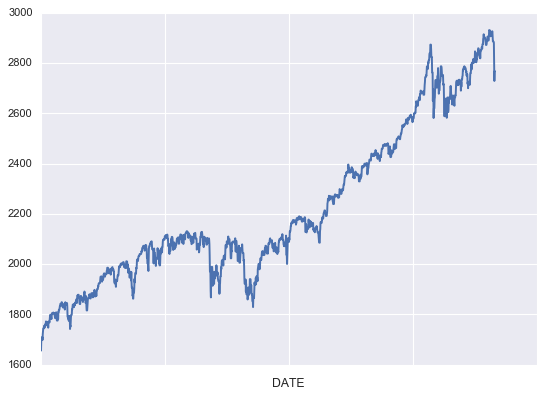

In [27]:
#try
data["SP500"]=pd.to_numeric(data3["SP500"])
fig = plt.figure() #pot the figure
data3['SP500'].plot()

Text(0.5,0,'DATE')

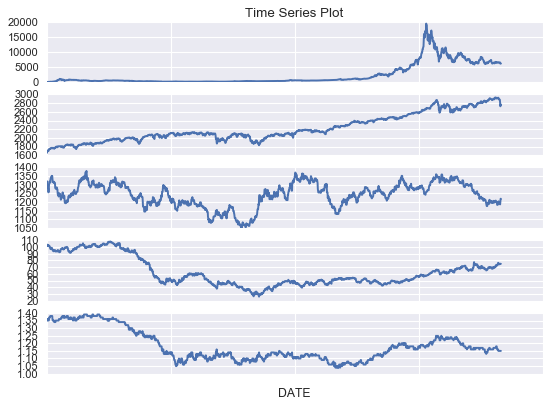

In [28]:
from pandas import Series
from matplotlib import pyplot

fig = plt.figure()
plt.subplot(5,1,1) #create 3 subplots
data3['Close_USD_B'].plot()
plt.title('Time Series Plot')
plt.subplot(5,1,2)
data3['SP500'].plot()
plt.subplot(5,1,3)
data3['GOLDAM'].plot()
plt.subplot(5,1,4)
data3['DCOILWTICO'].plot()
plt.subplot(5,1,5)
data3['DEXUSEU'].plot()

plt.xlabel('DATE')

In [29]:
#Q5#OLS regression

In [30]:
Y = data3['Close_USD_B']
X2 = data3['SP500']
X3 = data3['GOLDAM']
X4 = data3['DCOILWTICO']
X5 = data3['DEXUSEU']

BigX = sm.add_constant(pd.concat((X2,X3,X4,X5),1))

model1 = sm.OLS(Y,BigX).fit()
e = Y-model1.predict()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close_USD_B   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1764.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:40:40   Log-Likelihood:                -16100.
No. Observations:                1833   AIC:                         3.221e+04
Df Residuals:                    1828   BIC:                         3.224e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.282e+04    974.569    -43.941      0.000   -4.47e+04   -4.09e+04
SP500         10.5190      0.137     76.784      0.000      10.250      10.788
GOLDAM        -1.6113      0.660     -2.442      0.015      -2.906      -0.317
DCOILWTICO   -59.4328      4.239    -14.019      0.000     -67.747     -51.118
DEXUSEU     2.334e+04    984.136     23.717      0.000    2.14e+04    2.53e+04
==============================================================================
Omnibus:                     1182.473   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18198.754
Skew:                           2.801   Prob(JB):                         0.00
Kurtosis:                      17.384   Cond. No.                     8.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#We can see that all of variables series are pretty significant to the bitcoin price. In here we can realize that GOLDAM 
#and DCOILWTICO are strongly negative to the price of bitcoin.However, others are strongly positive to the price. 

In [32]:
#Q6 #regression + KPSS

In [33]:
data3.columns

Index(['Close_USD_B', 'SP500', 'GOLDAM', 'DCOILWTICO', 'DEXUSEU', 'ndx'], dtype='object')

In [34]:
#KPSS

In [35]:
#all variables KPSS
from statsmodels.tsa.stattools import kpss #see the stationary or not in time series
n=data3.shape[0]

print(kpss(data3["Close_USD_B"],regression='c',lags=int(3*np.sqrt(n)//13))) #not stationary-->try other test(diff)
print(kpss(data3["SP500"],regression='c',lags=int(3*np.sqrt(n)//13))) #not stationary
print(kpss(data3["GOLDAM"],regression='c',lags=int(3*np.sqrt(n)//13))) #not stationary
print(kpss(data3["DCOILWTICO"],regression='c',lags=int(3*np.sqrt(n)//13))) #not stationary
print(kpss(data3["DEXUSEU"],regression='c',lags=int(3*np.sqrt(n)//13))) #not stationary

(10.44643677051523, 0.01, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(16.036618025141554, 0.01, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(2.0708321819287594, 0.01, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(7.317448384421416, 0.01, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(7.504774940327038, 0.01, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [36]:
data3['dClose_USD_B'] = data3['Close_USD_B'].diff()
data3['dSP500'] = data3['SP500'].diff()
data3['dGOLDAM'] = data3['GOLDAM'].diff()
data3['dDCOILWTICO'] = data3['DCOILWTICO'].diff()
data3['dDEXUSEU'] = data3['DEXUSEU'].diff()

In [37]:
#diff of all variables
print(kpss(data3["dClose_USD_B"][1:],regression='c',lags=int(3*np.sqrt(n)//13))) #stationary
print(kpss(data3["dSP500"][1:],regression='c',lags=int(3*np.sqrt(n)//13))) #stationary
print(kpss(data3["dGOLDAM"][1:],regression='c',lags=int(3*np.sqrt(n)//13))) #stationary
print(kpss(data3["dDCOILWTICO"][1:],regression='c',lags=int(3*np.sqrt(n)//13))) #unstationary
print(kpss(data3["dDEXUSEU"][1:],regression='c',lags=int(3*np.sqrt(n)//13))) #unstationary

(0.06430612018130376, 0.1, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(0.04114581929756154, 0.1, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(0.048920147999156643, 0.1, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(0.6468790742889124, 0.018374629610098867, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(0.2618315799488442, 0.1, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [38]:
data3['ddDCOILWTICO'] = data3['dDCOILWTICO'].diff()
data3['ddDEXUSEU'] = data3['dDEXUSEU'].diff()

In [39]:
#diff diff DCOILWTICO,DEXUSEU
print(kpss(data3["ddDCOILWTICO"][2:],regression='c',lags=int(3*np.sqrt(n)//13))) #stationary
print(kpss(data3["ddDEXUSEU"][2:],regression='c',lags=int(3*np.sqrt(n)//13))) #stationary

(0.0030135324108734184, 0.1, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(0.0026901724712989163, 0.1, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [40]:
#DCOILWTICO,DEXUSEU need to do two times of diff. Other variables just need to fo one time diff. Those variables 
#will become stationary.

In [41]:
data3.index = pd.to_datetime(data3.index)
data3.index

DatetimeIndex(['2013-10-07', '2013-10-08', '2013-10-09', '2013-10-10',
               '2013-10-11', '2013-10-12', '2013-10-13', '2013-10-14',
               '2013-10-15', '2013-10-16',
               ...
               '2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07',
               '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11',
               '2018-10-12', '2018-10-13'],
              dtype='datetime64[ns]', name='DATE', length=1833, freq=None)

In [42]:
#Q7 #OLS regression:

y = data3['dClose_USD_B'][2:]
x2 = data3['dSP500'][2:]
x3 = data3['dGOLDAM'][2:]
x4 = data3['ddDCOILWTICO'][2:]
x5 = data3['ddDEXUSEU'][2:]

bigX = sm.add_constant(pd.concat((x2,x3,x4,x5),1))

model2 = sm.OLS(y,bigX).fit()
e = y-model2.predict()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dClose_USD_B   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.873
Date:                Sun, 25 Nov 2018   Prob (F-statistic):              0.113
Time:                        21:40:45   Log-Likelihood:                -12540.
No. Observations:                1831   AIC:                         2.509e+04
Df Residuals:                    1826   BIC:                         2.512e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8582      5.344      0.535      0.593      -7.624      13.340
dSP500           0.8121      0.382      2.124      0.034       0.062       1.562
dGOLDAM          0.5620      0.653      0.861      0.389      -0.718       1.842
ddDCOILWTICO     4.3797      3.749      1.168      0.243      -2.973      11.732
ddDEXUSEU      -77.7351    605.801     -0.128      0.898   -1265.871    1110.401
==============================================================================
Omnibus:                      630.632   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68851.594
Skew:                           0.588   Prob(JB):                         0.00
Kurtosis:                      33.018   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#In here, we adjust the variables series into diff or double diff. We can find out the correct type of data was corrected so that
#the coefficients, std, p value and so on are changed. In here, compared with model1, we can recognize that most of variables are 
#insignificant to the price of Bitcoin expect to dSP500. We can say that only dSP500 is strongly significant to price of Bitcoin
#but others are not. 

In [44]:
#Q8 #Remove all the data before 2017

In [45]:
#ARIMA (need)
data3.index = pd.to_datetime(data3.index)
data3.index

DatetimeIndex(['2013-10-07', '2013-10-08', '2013-10-09', '2013-10-10',
               '2013-10-11', '2013-10-12', '2013-10-13', '2013-10-14',
               '2013-10-15', '2013-10-16',
               ...
               '2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07',
               '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11',
               '2018-10-12', '2018-10-13'],
              dtype='datetime64[ns]', name='DATE', length=1833, freq=None)

In [46]:
data3

,Close_USD_B,SP500,GOLDAM,DCOILWTICO,DEXUSEU,ndx,dClose_USD_B,dSP500,dGOLDAM,dDCOILWTICO,dDEXUSEU,ddDCOILWTICO,ddDEXUSEU
DATE,,,,,,,,,,,,,
2013-10-07,123.61,1676.12,1311.00,103.07,1.36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-08,124.18,1655.45,1321.00,103.54,1.36,1,0.57,-20.67,10.00,0.47,0.00,NaN,NaN
2013-10-09,123.84,1656.40,1309.50,101.63,1.35,2,-0.34,0.95,-11.50,-1.91,-0.01,-2.38,-0.01
2013-10-10,125.86,1692.56,1298.00,103.08,1.35,3,2.02,36.16,-11.50,1.45,0.00,3.36,0.01
2013-10-11,125.86,1703.20,1285.75,102.17,1.36,4,0.00,10.64,-12.25,-0.91,0.01,-2.36,0.01
2013-10-12,127.00,1703.20,1285.75,102.17,1.36,5,1.14,0.00,0.00,0.00,0.00,0.91,-0.01
2013-10-13,131.84,1703.20,1285.75,102.17,1.36,6,4.84,0.00,0.00,0.00,0.00,0.00,0.00
2013-10-14,135.59,1710.14,1276.00,102.46,1.36,7,3.75,6.94,-9.75,0.29,0.00,0.29,0.00
2013-10-15,133.88,1698.06,1255.50,101.15,1.35,8,-1.71,-12.08,-20.50,-1.31,-0.01,-1.60,-0.01


In [47]:
data3.index

DatetimeIndex(['2013-10-07', '2013-10-08', '2013-10-09', '2013-10-10',
               '2013-10-11', '2013-10-12', '2013-10-13', '2013-10-14',
               '2013-10-15', '2013-10-16',
               ...
               '2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07',
               '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11',
               '2018-10-12', '2018-10-13'],
              dtype='datetime64[ns]', name='DATE', length=1833, freq=None)

In [48]:
data4=data3[(data3.index.year >= 2017)]

In [49]:
print(data4.head())
print(data4.tail())

            Close_USD_B    SP500   GOLDAM  DCOILWTICO  DEXUSEU   ndx  \
DATE                                                                   
2017-01-01       998.07  2238.83  1159.10       53.75     1.06  1182   
2017-01-02      1020.00  2238.83  1159.10       53.75     1.06  1183   
2017-01-03      1037.99  2257.83  1148.65       52.36     1.04  1184   
2017-01-04      1139.52  2270.75  1165.90       53.26     1.05  1185   
2017-01-05       996.40  2269.00  1173.05       53.77     1.06  1186   

            dClose_USD_B  dSP500  dGOLDAM  dDCOILWTICO  dDEXUSEU  \
DATE                                                               
2017-01-01         29.86    0.00     0.00         0.00      0.00   
2017-01-02         21.93    0.00     0.00         0.00      0.00   
2017-01-03         17.99   19.00   -10.45        -1.39     -0.02   
2017-01-04        101.53   12.92    17.25         0.90      0.01   
2017-01-05       -143.12   -1.75     7.15         0.51      0.01   

            ddDCOI

In [50]:
#Q9 Plot the ACF and PACF of the bitcoin price

In [51]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA

In [52]:
ts=data4["Close_USD_B"]
ts_log=np.log(ts)
ts_log_diff = ts_log - ts_log.shift()

In [53]:
ts_log_diff.dropna(inplace=True)

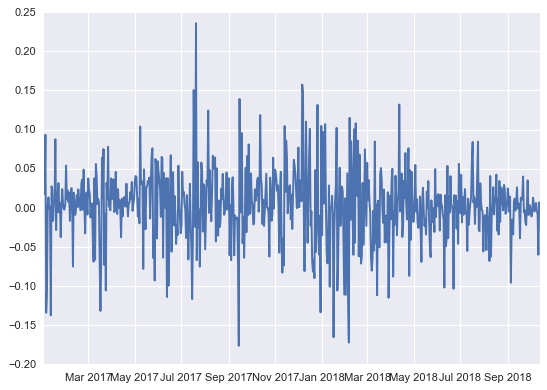

In [54]:
plt.plot(ts_log_diff)

In [55]:
#plot
#An importance concern here is how to 
#determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [56]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

In [57]:
print(lag_acf)
print(lag_pacf)

[ 1.          0.00157256  0.03995928  0.00977988 -0.06592086  0.0524065
  0.03886822 -0.02741446  0.03874793  0.00550481  0.05108085 -0.00293951
 -0.0043475  -0.04875881  0.00819089  0.01174975 -0.01431696  0.03255375
  0.05943125  0.04916689  0.08759223]
[ 1.          0.00157259  0.03995762  0.00974743 -0.0679365   0.05185543
  0.04505287 -0.03134376  0.02956345  0.01481292  0.05152846 -0.0118119
 -0.00401221 -0.05017054  0.01264222  0.01195409 -0.01998952  0.02669906
  0.06555724  0.05179825  0.07263322]


Text(0.5,1,'Autocorrelation Function')

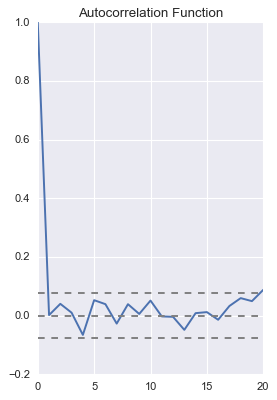

In [58]:
#ACF (with lags effect)
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

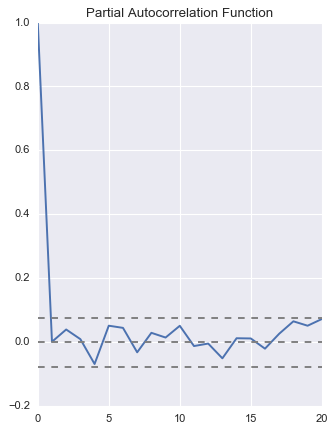

In [59]:
#PACF (without lags effect(time effect))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [60]:
#p=1, q=1-->need to test how to decide d???-->KPSS decides

In [61]:
#order:(p,d,q)
#ARM: only p
#MA(Error): only q

#combined

In [62]:
#Q10

C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 1.4067')

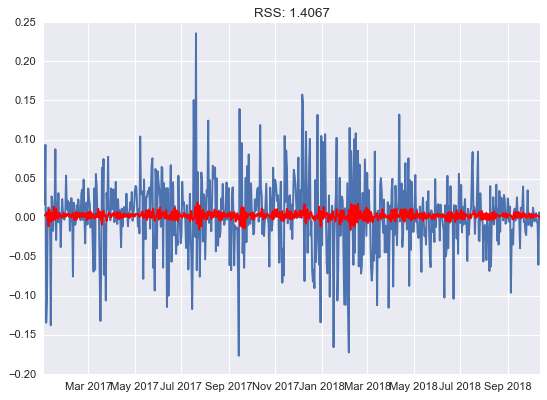

In [63]:
model = ARIMA(ts_log, order=(3,1,2)) #why I cannot use (3,1,3)? 
results_AR = model.fit(disp=True)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [64]:
#choose the best AIC for AR

import pandas as pd
import statsmodels.formula.api as sm 
import matplotlib.pyplot as plt 
import pandas_datareader as pdr

best=np.zeros((3,6,6))

for d in range(3):
    for p in range(6):
        for q in range(6):
            if p>q & p>d:
                modelt = ARIMA(ts_log, order=(p,d,q))
                resultst = modelt.fit(disp=True)
                best[d,p,q]=resultst.aic
               
print(best)

#the best one is (p,d,q)=(3,1,2) --> but it is not consist to the ACF and PACF #why we have to d<p??

C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\RT\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\RT\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retval

[[[    0.             0.             0.             0.
       0.             0.        ]
  [    0.             0.             0.             0.
       0.             0.        ]
  [    0.             0.             0.             0.
       0.             0.        ]
  [    0.         -2121.94211378 -2124.34010142     0.
       0.         -2120.04357444]
  [    0.             0.             0.             0.
       0.             0.        ]
  [    0.         -2121.42625193     0.         -2119.99252697
   -2119.73131604     0.        ]]

 [[    0.             0.             0.             0.
       0.             0.        ]
  [    0.             0.             0.             0.
       0.             0.        ]
  [    0.             0.             0.             0.
       0.             0.        ]
  [    0.             0.         -2129.65975638     0.
       0.             0.        ]
  [    0.             0.             0.             0.
       0.             0.        ]
  [    0.  

In [65]:
import pandas as pd
#import pandas.io.data
import statsmodels.formula.api as sm 
import matplotlib.pyplot as plt 
#from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.arima_model import ARMAResults 
import pandas_datareader as pdr
pdr.get_data_yahoo('AAPL')

results_AR.summary()
results_AR.aic
#print(ARMAResults.summary(results_AR))

C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


-2129.659756384547

In [66]:
#import pandas_datareader as pdr
#from pandas_datareader import data, wb

In [67]:
#from statsmodels.tsa.arima_model import ARMAResults 
#print(ARMAResults.summary(results_AR))

In [68]:
#from statsmodels.tsa.arima_model import ARMAResults
#import statsmodels
#model
#statsmodels.tsa.arima_model.ARIMAResults.aic(model)

In [69]:
#from statsmodels.tsa.arima_model import ARMAResults
#model2 = ARIMA(ts_log, order=(3,1,3)) 
#results_AR = model2.fit(disp=True)  

In [70]:
#Q11 #forecast the next 30 days (the number is little bit weird)??

#model = ARIMA(ts_log, order=(3,1,1)) #why I cannot use (3,1,3)? 
#results_AR = model.fit(disp=True)  


from pandas import datetime
start_index = datetime(2018, 10, 13)
end_index = datetime(2018, 11, 13)
forecast = results_AR.predict(start=start_index, end=end_index) #why we can just use predict in here?
#print(ts_log)
ts
print(forecast)
print((1+forecast.cumsum())*ts[-1])

2018-10-13   -0.000596
2018-10-14    0.002173
2018-10-15    0.005932
2018-10-16    0.000598
2018-10-17    0.002567
2018-10-18    0.004660
2018-10-19    0.001325
2018-10-20    0.002823
2018-10-21    0.003897
2018-10-22    0.001830
2018-10-23    0.002921
2018-10-24    0.003439
2018-10-25    0.002174
2018-10-26    0.002943
2018-10-27    0.003168
2018-10-28    0.002403
2018-10-29    0.002933
2018-10-30    0.003010
2018-10-31    0.002553
2018-11-01    0.002911
2018-11-02    0.002920
2018-11-03    0.002651
2018-11-04    0.002889
2018-11-05    0.002869
2018-11-06    0.002714
2018-11-07    0.002869
2018-11-08    0.002842
2018-11-09    0.002753
2018-11-10    0.002853
2018-11-11    0.002827
2018-11-12    0.002778
2018-11-13    0.002842
Freq: D, dtype: float64
2018-10-13    6197.103068
2018-10-14    6210.578828
2018-10-15    6247.360263
2018-10-16    6251.067630
2018-10-17    6266.986229
2018-10-18    6295.880407
2018-10-19    6304.093962
2018-10-20    6321.597773
2018-10-21    6345.760123
2018-1

C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [71]:
#Q12 #Plot the periodogram of the data

In [72]:
# Do preliminary imports and notebook setup
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use seaborn for plot styles
import seaborn; seaborn.set()

In [73]:
#t, mag, dmag = list(data4).get_light_curve(DATE).T

In [74]:
#f, Pxx_den = signal.periodogram(data4, fs)
#plt.semilogy(f, Pxx_den)
#plt.ylim([1e-7, 1e2])
#plt.xlabel('frequency [Hz]')
#plt.ylabel('PSD [V**2/Hz]')
#plt.show()

In [75]:
#import spectrum
#from spectrum import *
#psd = WelchPeriodogram(data4, 1833)

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
import astropy.units as u
#import sunpy.timeseries

In [77]:
x_ray = ts
freq, spectra = signal.periodogram(ts.diff()[1:])

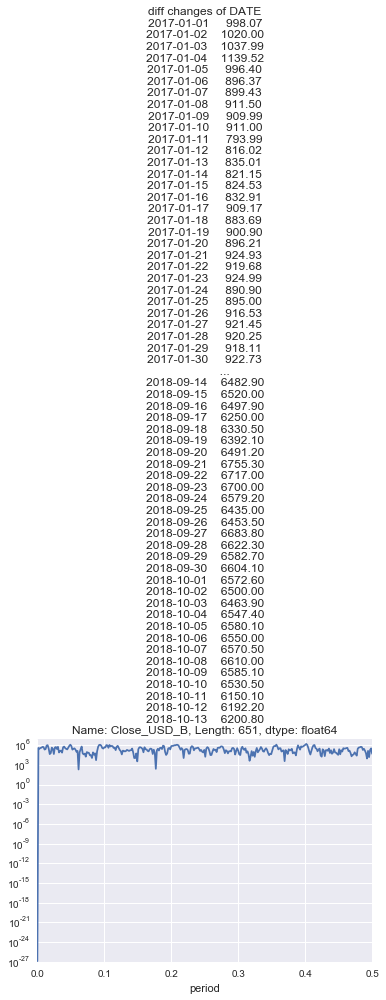

In [78]:
plt.semilogy(freq, spectra)
plt.title('diff changes of {}'.format(x_ray))
#plt.ylabel('Power Spectral Density [{:LaTeX}]'.format(["x_ray"][1:]** 2 / u.Hz))
plt.xlabel('period')
plt.show()

In [79]:
#Q13 #VAR BY AIC

Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and an error term.

In [80]:
data4.index = pd.to_datetime(data4.index)
data4.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07',
               '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11',
               '2018-10-12', '2018-10-13'],
              dtype='datetime64[ns]', name='DATE', length=651, freq=None)

In [81]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR

In [82]:
data5=np.matrix(data4)

In [83]:
data5[:,0:5]
ndata=pd.DataFrame(data5[:,0:5], columns=['Close_USD_B', 'SP500', 'GOLDAM', 'DCOILWTICO', 'DEXUSEU'])
ndata

newdata=np.log(ndata).diff()

In [84]:
ndata.index= pandas.DatetimeIndex(data4.index)

In [85]:
newdata.index = pandas.DatetimeIndex(data4.index)

In [86]:
newdata=newdata.dropna()

In [87]:
modelV=VAR(newdata)

In [89]:
result1=modelV.fit(1)
result1.summary()

C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 25, Nov, 2018
Time:                     21:41:48
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -46.2206
Nobs:                     649.000    HQIC:                  -46.3473
Log likelihood:           10491.3    FPE:                6.86743e-21
AIC:                     -46.4275    Det(Omega_mle):     6.55860e-21
--------------------------------------------------------------------
Results for equation Close_USD_B
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.003057         0.001839            1.662           0.097
L1.Close_USD_B         0.006602         0.039293            0.168           0.867
L1.SP500              -0.180078         0.326522  

In [204]:
result2=modelV.fit(2)
result2.summary()

C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Oct, 2018
Time:                     18:02:14
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -46.0380
Nobs:                     648.000    HQIC:                  -46.2704
Log likelihood:           10497.0    FPE:                6.93513e-21
AIC:                     -46.4177    Det(Omega_mle):     6.37533e-21
--------------------------------------------------------------------
Results for equation Close_USD_B
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.002686         0.001848            1.453           0.147
L1.Close_USD_B         0.016635         0.039602            0.420           0.675
L1.SP500              -0.190808         0.328973  

In [205]:
result3=modelV.fit(15)
result3.summary()

C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Oct, 2018
Time:                     18:02:14
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -43.3960
Nobs:                     635.000    HQIC:                  -45.0263
Log likelihood:           10499.3    FPE:                9.96335e-21
AIC:                     -46.0611    Det(Omega_mle):     5.66143e-21
--------------------------------------------------------------------
Results for equation Close_USD_B
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.002780         0.001961            1.418           0.157
L1.Close_USD_B          0.033294         0.042423            0.785           0.433
L1.SP500               -0.253812         0.346

In [91]:
#choose the best AIC model automatically
mresult= modelV.fit(maxlags=15, ic='aic')
mresult.summary()

C:\Users\RT\Anaconda\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 25, Nov, 2018
Time:                     22:24:20
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -46.2206
Nobs:                     649.000    HQIC:                  -46.3473
Log likelihood:           10491.3    FPE:                6.86743e-21
AIC:                     -46.4275    Det(Omega_mle):     6.55860e-21
--------------------------------------------------------------------
Results for equation Close_USD_B
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.003057         0.001839            1.662           0.097
L1.Close_USD_B         0.006602         0.039293            0.168           0.867
L1.SP500              -0.180078         0.326522  

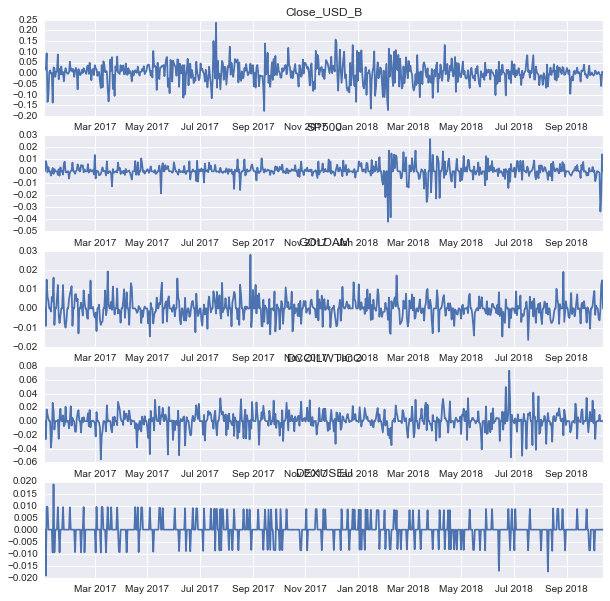

In [207]:
#plot
mresult.plot()

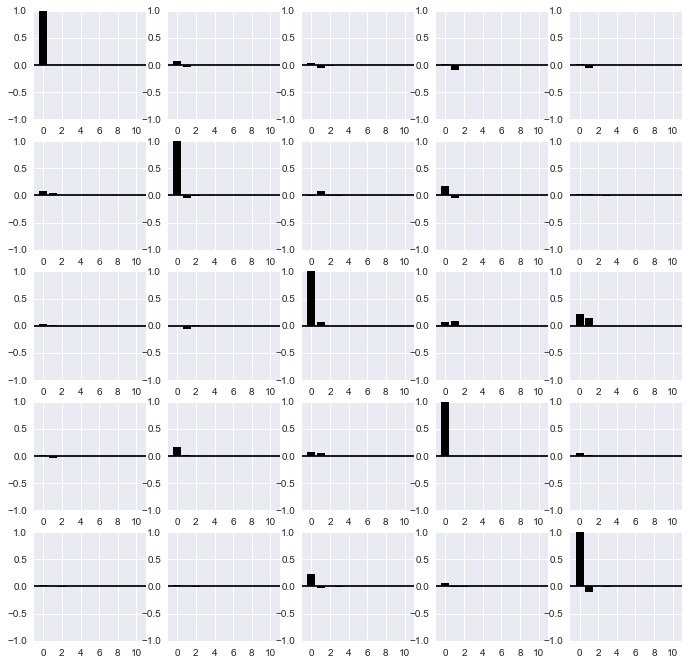

In [208]:
mresult.plot_acorr()

* In here, we can notice that they AR(1) --> lag one for all vafriables for the model will be sutable to expalin 5 different varaibles we want to focus on by AIC. In the model, we can see that if we want to target the difference of bitcoin price percentage, we will have the mutiple effects by variable coefficients just like result1 and mresult shows up. Most of variables are significant to difference percentage of bitcoin price.

In [209]:
#Q14 #Forecast the next 30 days of the prices using the VAR model

In [93]:
lag_order = mresult.k_ar #optimal lag
print(lag_order)

#try
print(newdata.values[-2:])
print(type(newdata.values[-2:]))

print(type(newdata))
newdata #from bottom to top

1
[[0.00682209 0.01410632 0.01458794 0.         0.        ]
 [0.00138788 0.         0.         0.         0.        ]]
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


,Close_USD_B,SP500,GOLDAM,DCOILWTICO,DEXUSEU
DATE,,,,,
2017-01-02,0.021734,0.000000,0.000000,0.000000,0.000000
2017-01-03,0.017484,0.008451,-0.009057,-0.026201,-0.019048
2017-01-04,0.093321,0.005706,0.014906,0.017043,0.009569
2017-01-05,-0.134214,-0.000771,0.006114,0.009530,0.009479
2017-01-06,-0.105796,0.003511,0.004211,0.003898,0.000000
2017-01-07,0.003408,0.000000,0.000000,0.000000,0.000000
2017-01-08,0.013330,0.000000,0.000000,0.000000,0.000000
2017-01-09,-0.001658,-0.003555,-0.001614,-0.038332,0.000000
2017-01-10,0.001109,0.000000,0.006019,-0.021992,0.000000


In [94]:
mmresult=mresult.forecast(newdata.values[-lag_order:], 30) #start point to end point 

In [95]:
mmresult

array([[3.06661183e-03, 3.33121414e-04, 5.77242089e-05, 4.88370407e-04,
        1.35336538e-04],
       [2.79096188e-03, 3.26108866e-04, 7.72871663e-05, 5.07969349e-04,
        1.24941691e-04],
       [2.78251632e-03, 3.26395582e-04, 7.70485777e-05, 5.12459773e-04,
        1.25617709e-04],
       [2.78084079e-03, 3.26250847e-04, 7.72789184e-05, 5.12553707e-04,
        1.25522703e-04],
       [2.78079168e-03, 3.26267984e-04, 7.72828153e-05, 5.12586677e-04,
        1.25529340e-04],
       [2.78077408e-03, 3.26266860e-04, 7.72838576e-05, 5.12589155e-04,
        1.25528648e-04],
       [2.78077338e-03, 3.26266869e-04, 7.72839270e-05, 5.12589363e-04,
        1.25528683e-04],
       [2.78077327e-03, 3.26266869e-04, 7.72839407e-05, 5.12589381e-04,
        1.25528678e-04],
       [2.78077326e-03, 3.26266869e-04, 7.72839408e-05, 5.12589384e-04,
        1.25528678e-04],
       [2.78077326e-03, 3.26266869e-04, 7.72839409e-05, 5.12589384e-04,
        1.25528678e-04],
       [2.78077326e-03, 3.2626

In [97]:
mmmresult=pd.DataFrame(mmresult,columns=['Close_USD_B', 'SP500', 'GOLDAM', 'DCOILWTICO', 'DEXUSEU'])

from datetime import datetime, timedelta
date_today = datetime(2018, 10, 13)
days = pd.date_range(date_today, date_today + timedelta(29), freq='D')

len(mmmresult.index)
mmmresult.head()

len(days)
days

mmmresult.index=days
mmmresult

#print((1+forecast.cumsum())*ts[-1]) ##AR 30 forecast 

print(ndata[-1:])
print(mmmresult)
print((1+mmmresult.cumsum())*ndata[-1:]) # VAR 30 forecast(real number)

#it is hard to calculate in DataFrame
new_forecast = mmmresult.mul(ndata[-1:], axis=1)
new_forecast
#we need to switch to array 

            Close_USD_B    SP500   GOLDAM  DCOILWTICO  DEXUSEU
DATE                                                          
2018-10-13       6200.8  2767.13  1218.75       74.95     1.15
            Close_USD_B     SP500    GOLDAM  DCOILWTICO   DEXUSEU
2018-10-13     0.003067  0.000333  0.000058    0.000488  0.000135
2018-10-14     0.002791  0.000326  0.000077    0.000508  0.000125
2018-10-15     0.002783  0.000326  0.000077    0.000512  0.000126
2018-10-16     0.002781  0.000326  0.000077    0.000513  0.000126
2018-10-17     0.002781  0.000326  0.000077    0.000513  0.000126
2018-10-18     0.002781  0.000326  0.000077    0.000513  0.000126
2018-10-19     0.002781  0.000326  0.000077    0.000513  0.000126
2018-10-20     0.002781  0.000326  0.000077    0.000513  0.000126
2018-10-21     0.002781  0.000326  0.000077    0.000513  0.000126
2018-10-22     0.002781  0.000326  0.000077    0.000513  0.000126
2018-10-23     0.002781  0.000326  0.000077    0.000513  0.000126
2018-10-24     0.00

,Close_USD_B,SP500,GOLDAM,DCOILWTICO,DEXUSEU
2018-10-13,19.015447,0.92179,0.070351,0.036603,0.000156
2018-10-14,NaN,NaN,NaN,NaN,NaN
2018-10-15,NaN,NaN,NaN,NaN,NaN
2018-10-16,NaN,NaN,NaN,NaN,NaN
2018-10-17,NaN,NaN,NaN,NaN,NaN
2018-10-18,NaN,NaN,NaN,NaN,NaN
2018-10-19,NaN,NaN,NaN,NaN,NaN
2018-10-20,NaN,NaN,NaN,NaN,NaN
2018-10-21,NaN,NaN,NaN,NaN,NaN
2018-10-22,NaN,NaN,NaN,NaN,NaN


In [98]:
#real number of VAR forecast#

type(mmmresult)
mv=((mmmresult.values.cumsum())+1)
nv=ndata[-1:].values

type(mv)
len(mv)

mv_lst=[]

for i in range(len(mv)):
    if (i%5 == 4) :
        mv_lst.append([mv[i-4],mv[i-3],mv[i-2],mv[i-1],mv[i]])
#print(mv_lst)
#print(len(mv))
len(mv_lst)


real_fore=pd.DataFrame(mv_lst*nv,columns=['Close_USD_B', 'SP500', 'GOLDAM', 'DCOILWTICO', 'DEXUSEU'])
real_fore

from datetime import datetime, timedelta
date_today = datetime(2018, 10, 13)
days = pd.date_range(date_today, date_today + timedelta(29), freq='D')

real_fore.index=days

print(real_fore) #final

#nv
#mmv=mv*nv
#mmv
#3.06661183e-03*6.20080e+03
#3.33121414e-04*2.76713e+03
#5.77242089e-05*1.21875e+03
#4.88370407e-04*7.49500e+01=0.03660336200465
#1.35336538e-04*1.15000e+00=0.0001556370187

            Close_USD_B        SP500       GOLDAM  DCOILWTICO   DEXUSEU
2018-10-13  6219.815447  2776.537504  1222.963776   75.245740  1.154693
2018-10-14  6243.412681  2787.048452  1227.617043   75.533373  1.159095
2018-10-15  6267.092441  2797.616427  1232.271292   75.819934  1.163492
2018-10-16  6290.794146  2808.193000  1236.929901   76.106433  1.167888
2018-10-17  6314.496070  2818.770119  1241.588474   76.392926  1.172284
2018-10-18  6338.198262  2829.347307  1246.247074   76.679418  1.176680
2018-10-19  6361.900459  2839.924500  1250.905675   76.965910  1.181076
2018-10-20  6385.602658  2850.501695  1255.564276   77.252402  1.185471
2018-10-21  6409.304858  2861.078889  1260.222878   77.538894  1.189867
2018-10-22  6433.007057  2871.656083  1264.881479   77.825386  1.194263
2018-10-23  6456.709256  2882.233278  1269.540080   78.111878  1.198659
2018-10-24  6480.411455  2892.810472  1274.198682   78.398370  1.203055
2018-10-25  6504.113654  2903.387666  1278.857283   78.684862  1

In [99]:
mv

array([1.00306661, 1.00339973, 1.00345746, 1.00394583, 1.00408116,
       1.00687213, 1.00719824, 1.00727552, 1.00778349, 1.00790843,
       1.01069095, 1.01101735, 1.01109439, 1.01160685, 1.01173247,
       1.01451331, 1.01483956, 1.01491684, 1.0154294 , 1.01555492,
       1.01833571, 1.01866198, 1.01873926, 1.01925185, 1.01937738,
       1.02215815, 1.02248442, 1.0225617 , 1.02307429, 1.02319982,
       1.02598059, 1.02630686, 1.02638414, 1.02689673, 1.02702226,
       1.02980303, 1.0301293 , 1.03020659, 1.03071918, 1.0308447 ,
       1.03362548, 1.03395174, 1.03402903, 1.03454162, 1.03466715,
       1.03744792, 1.03777419, 1.03785147, 1.03836406, 1.03848959,
       1.04127036, 1.04159663, 1.04167391, 1.0421865 , 1.04231203,
       1.0450928 , 1.04541907, 1.04549635, 1.04600894, 1.04613447,
       1.04891525, 1.04924151, 1.0493188 , 1.04983139, 1.04995691,
       1.05273769, 1.05306395, 1.05314124, 1.05365383, 1.05377936,
       1.05656013, 1.0568864 , 1.05696368, 1.05747627, 1.05760

In [100]:
nv

array([[6.20080e+03, 2.76713e+03, 1.21875e+03, 7.49500e+01, 1.15000e+00]])

In [103]:
mv*nv

ValueError: operands could not be broadcast together with shapes (150,) (1,5) 

In [102]:
mv_lst

[[1.0030666118304217,
  1.0033997332448277,
  1.0034574574537238,
  1.0039458278607574,
  1.004081164398337],
 [1.0068721262760485,
  1.0071982351419464,
  1.0072755223082943,
  1.0077834916568493,
  1.0079084333476782],
 [1.0106909496718575,
  1.011017345254027,
  1.0110943938317614,
  1.011606853604698,
  1.0117324713133866],
 [1.0145133120989496,
  1.0148395629458238,
  1.0149168418642296,
  1.0154293955711824,
  1.0155549182740646],
 [1.018335709949739,
  1.0186619779337498,
  1.0187392607490382,
  1.0192518474261494,
  1.019377376765957],
 [1.0221581508432225,
  1.022484417702988,
  1.0225617015605943,
  1.0230742907159083,
  1.02319981936383],
 [1.0259805927388408,
  1.026306859608287,
  1.0263841435353107,
  1.0268967328987915,
  1.0270222615816387],
 [1.0298030348485436,
  1.0301293017175435,
  1.0302065856582463,
  1.0307191750393079,
  1.030844703716998],
 [1.0336254769756457,
  1.033951743845056,
  1.034029027785885,
  1.0345416171696336,
  1.03466714584771],
 [1.03744791910

In [105]:
mv_lst*nv

array([[6.21981545e+03, 2.77653750e+03, 1.22296378e+03, 7.52457398e+01,
        1.15469334e+00],
       [6.24341268e+03, 2.78704845e+03, 1.22761704e+03, 7.55333727e+01,
        1.15909470e+00],
       [6.26709244e+03, 2.79761643e+03, 1.23227129e+03, 7.58199337e+01,
        1.16349234e+00],
       [6.29079415e+03, 2.80819300e+03, 1.23692990e+03, 7.61064332e+01,
        1.16788816e+00],
       [6.31449607e+03, 2.81877012e+03, 1.24158847e+03, 7.63929260e+01,
        1.17228398e+00],
       [6.33819826e+03, 2.82934731e+03, 1.24624707e+03, 7.66794181e+01,
        1.17667979e+00],
       [6.36190046e+03, 2.83992450e+03, 1.25090567e+03, 7.69659101e+01,
        1.18107560e+00],
       [6.38560266e+03, 2.85050169e+03, 1.25556428e+03, 7.72524022e+01,
        1.18547141e+00],
       [6.40930486e+03, 2.86107889e+03, 1.26022288e+03, 7.75388942e+01,
        1.18986722e+00],
       [6.43300706e+03, 2.87165608e+03, 1.26488148e+03, 7.78253862e+01,
        1.19426303e+00],
       [6.45670926e+03, 2.8822

In [253]:
ndata

,Close_USD_B,SP500,GOLDAM,DCOILWTICO,DEXUSEU
0,998.07,2238.83,1159.10,53.75,1.06
1,1020.00,2238.83,1159.10,53.75,1.06
2,1037.99,2257.83,1148.65,52.36,1.04
3,1139.52,2270.75,1165.90,53.26,1.05
4,996.40,2269.00,1173.05,53.77,1.06
5,896.37,2276.98,1178.00,53.98,1.06
6,899.43,2276.98,1178.00,53.98,1.06
7,911.50,2276.98,1178.00,53.98,1.06
8,909.99,2268.90,1176.10,51.95,1.06
9,911.00,2268.90,1183.20,50.82,1.06


In [99]:
#plot

In [100]:
#forecast for VAR:Produce linear minimum MSE forecasts for desired number of steps ahead, using prior values y
#? Is it like AIC/BIC step?

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'statsmodels.tsa.vector_ar.var_model.VARResultsWrapper'>


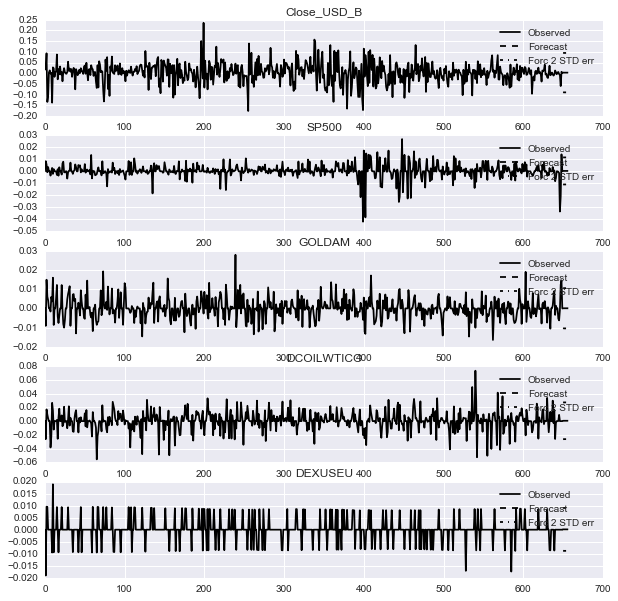

In [101]:
print(type(mmmresult))
print(type(mmresult))
print(type(mresult)) #VAR model not dataFrame or array

mresult.plot_forecast(10)